# Machine Learning on the Titanic Dataset

This notebook focuses on one of [Kaggle's](https://www.kaggle.com/c/titanic) "Getting Started" prediction competitions, the Titanic challenge.

In [65]:
from sklearn.model_selection import train_test_split

In [1]:
# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# modules to handle data
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# environment setup
sns.set()
plt.style.use('ggplot')
%matplotlib notebook

## I. Data Wrangling

Like in most cases with any data science project, we are likely to encounter dirty or missing data and will need to do some wrangling before we can really do anything else.

In [3]:
# load data
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [95]:
# save PassengerId for final submission
passengerId = test.PassengerId

# merge train and test
train = pd.concat([train,test],axis=1)

In [96]:
x=train.drop(columns=['Survived'])
y=train['Survived']

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [98]:
x_train.shape

(668, 19)

In [99]:
test.shape

(418, 11)

In [100]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,title,Age,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,1,0,7.2500,S,Mr,2,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,1,1,female,1,0,71.2833,C,Mrs,3,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,1,3,female,0,0,7.9250,S,Miss,2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,1,1,female,1,0,53.1000,S,Mrs,3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S
4,0,3,male,0,0,8.0500,S,Mr,3,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


In [101]:
train.isnull().sum()

Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
title            0
Age              0
PassengerId    473
Pclass         473
Name           473
Sex            473
Age            559
SibSp          473
Parch          473
Ticket         473
Fare           474
Cabin          800
Embarked       473
dtype: int64

In [102]:
# null values we have age and cabin

In [103]:
train.nunique()

Survived         2
Pclass           3
Sex              2
SibSp            7
Parch            7
Fare           248
Embarked         3
title           17
Age              8
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [104]:
# name feature- extraxt salute

In [107]:
train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,title,Age,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,1,0,7.2500,S,Mr,2,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,1,1,female,1,0,71.2833,C,Mrs,3,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,1,3,female,0,0,7.9250,S,Miss,2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,1,1,female,1,0,53.1000,S,Mrs,3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S
4,0,3,male,0,0,8.0500,S,Mr,3,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Rev,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,1,1,female,0,0,30.0000,S,Miss,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,0,3,female,1,2,23.4500,S,Miss,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,1,1,male,0,0,30.0000,C,Mr,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
train.drop(columns=['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [109]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,title,Age,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,1,0,7.2500,S,Mr,2,3.0,male,34.5,0.0,0.0,7.8292,NaN,Q
1,1,1,female,1,0,71.2833,C,Mrs,3,3.0,female,47.0,1.0,0.0,7.0000,NaN,S
2,1,3,female,0,0,7.9250,S,Miss,2,2.0,male,62.0,0.0,0.0,9.6875,NaN,Q
3,1,1,female,1,0,53.1000,S,Mrs,3,3.0,male,27.0,0.0,0.0,8.6625,NaN,S
4,0,3,male,0,0,8.0500,S,Mr,3,3.0,female,22.0,1.0,1.0,12.2875,NaN,S


In [110]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [111]:
train.Age.mean()

Age     2.340067
Age    30.272590
dtype: float64

In [112]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [113]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
title         0
Age           0
Pclass      473
Sex         473
Age         559
SibSp       473
Parch       473
Fare        474
Cabin       800
Embarked    473
dtype: int64

In [114]:
train['Embarked'].mode()

,Embarked,Embarked
0,S,S


In [115]:
train['Embarked'].fillna('S',inplace=True)

In [116]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
title         0
Age           0
Pclass      473
Sex         473
Age         559
SibSp       473
Parch       473
Fare        474
Cabin       800
Embarked    473
dtype: int64

In [117]:
train.drop(columns=['Cabin'],axis=1,inplace=True)

In [118]:
train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,title,Age,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S,Mr,2,3.0,male,34.5,0.0,0.0,7.8292,Q
1,1,1,female,1,0,71.2833,C,Mrs,3,3.0,female,47.0,1.0,0.0,7.0000,S
2,1,3,female,0,0,7.9250,S,Miss,2,2.0,male,62.0,0.0,0.0,9.6875,Q
3,1,1,female,1,0,53.1000,S,Mrs,3,3.0,male,27.0,0.0,0.0,8.6625,S
4,0,3,male,0,0,8.0500,S,Mr,3,3.0,female,22.0,1.0,1.0,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Rev,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,1,1,female,0,0,30.0000,S,Miss,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,0,3,female,1,2,23.4500,S,Miss,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,1,1,male,0,0,30.0000,C,Mr,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
title        object
Age           int32
Pclass      float64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

<IPython.core.display.Javascript object>


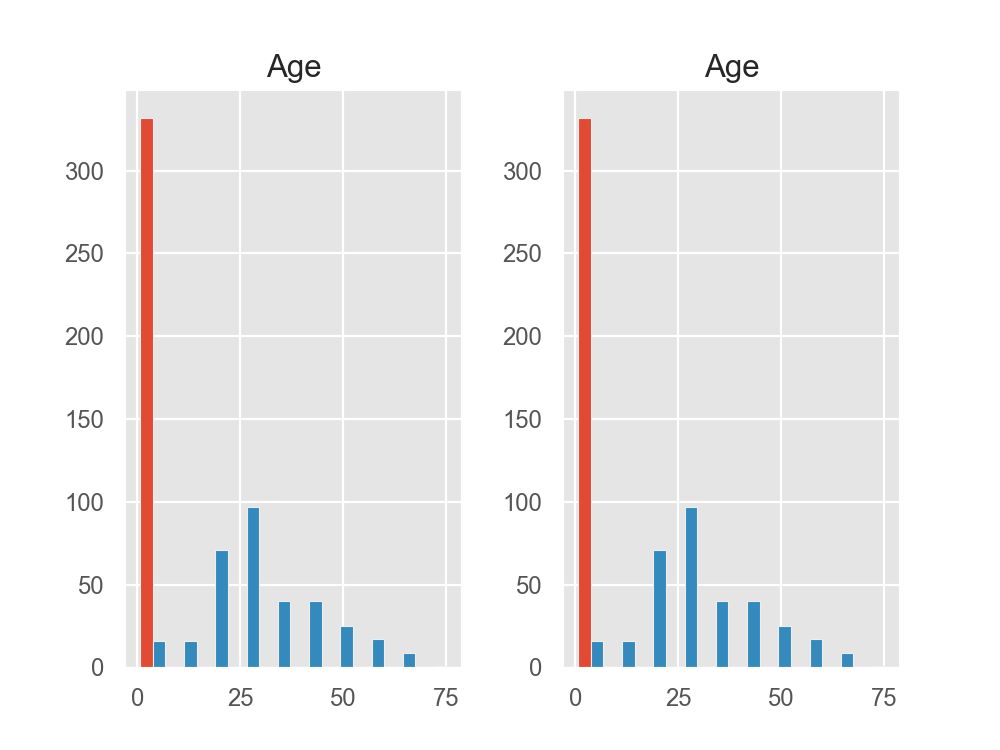

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FDD3EDFC8>,
      dtype=object)

In [120]:
train.Age.hist()

In [121]:
train.Age.min()

Age    0.00
Age    0.17
dtype: float64

In [122]:
bins=[0,10,20,30,40,50,60,70,80,90]
train['Age_cat']=pd.cut(train.Age,bins)

ValueError: Input array must be 1 dimensional

In [123]:
train.drop(columns=['Age'],axis=1,inplace=True)

In [124]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
title        object
Pclass      float64
Sex          object
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

In [125]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [126]:
train['Age']=LabelEncoder().fit_transform(train['Age_cat'])

KeyError: 'Age_cat'

In [127]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
title        object
Pclass      float64
Sex          object
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

In [128]:
train.drop(columns=['Age_cat'],axis=1,inplace=True)

KeyError: "['Age_cat'] not found in axis"

In [129]:
cat=train.select_dtypes(include=['object'])
num=train.select_dtypes(include=['int64','float64']).drop(columns=['Survived'])

In [130]:
dummies=pd.get_dummies(cat,drop_first=True)

In [131]:
num

,Pclass,SibSp,Parch,Fare,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500,3.0,0.0,0.0,7.8292
1,1,1,0,71.2833,3.0,1.0,0.0,7.0000
2,3,0,0,7.9250,2.0,0.0,0.0,9.6875
3,1,1,0,53.1000,3.0,0.0,0.0,8.6625
4,3,0,0,8.0500,3.0,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,NaN,NaN,NaN,NaN
887,1,0,0,30.0000,NaN,NaN,NaN,NaN
888,3,1,2,23.4500,NaN,NaN,NaN,NaN
889,1,0,0,30.0000,NaN,NaN,NaN,NaN


In [132]:
df=pd.concat([num,dummies],axis=1)

In [133]:
df

,Pclass,SibSp,Parch,Fare,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,...,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,7.2500,3.0,0.0,0.0,7.8292,1,0,...,0,1,0,0,0,0,0,1,1,0
1,1,1,0,71.2833,3.0,1.0,0.0,7.0000,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3,0,0,7.9250,2.0,0.0,0.0,9.6875,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,1,0,53.1000,3.0,0.0,0.0,8.6625,0,0,...,0,0,1,0,0,0,0,1,0,1
4,3,0,0,8.0500,3.0,1.0,1.0,12.2875,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,NaN,NaN,NaN,NaN,1,0,...,0,0,0,0,1,0,0,0,0,0
887,1,0,0,30.0000,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
888,3,1,2,23.4500,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,0,0,30.0000,NaN,NaN,NaN,NaN,1,0,...,0,1,0,0,0,0,0,0,0,0


In [134]:
x.shape

(891, 19)

In [135]:
y.shape

(891,)

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix

In [137]:
rf=RandomForestClassifier()

In [138]:
rf.fit(x_train,y_train,)

ValueError: could not convert string to float: 'male'

In [139]:
cross_val_score(rf,x_train,y_train,scoring='accuracy')

array([nan, nan, nan, nan, nan])